<a href="https://colab.research.google.com/github/tajuar-akash-hub/Machine-learning-algorithms/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/tajuar-akash-hub/Datasets.git


Cloning into 'Datasets'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 50 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (50/50), 4.50 MiB | 3.39 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [ ]:
import pandas as pd
data = '/content/Datasets/diabetes_two.csv'
df = pd.read_csv(data)
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58.0,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,NaN,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45.0,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,600.0,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 519 non-null    float64
 1   Gender              519 non-null    object 
 2   Polyuria            520 non-null    object 
 3   Polydipsia          520 non-null    object 
 4   sudden weight loss  520 non-null    object 
 5   weakness            519 non-null    object 
 6   Polyphagia          520 non-null    object 
 7   Genital thrush      520 non-null    object 
 8   visual blurring     520 non-null    object 
 9   Itching             520 non-null    object 
 10  Irritability        520 non-null    object 
 11  delayed healing     520 non-null    object 
 12  partial paresis     520 non-null    object 
 13  muscle stiffness    520 non-null    object 
 14  Alopecia            520 non-null    object 
 15  Obesity             520 non-null    object 
 16  class   

# Age

In [ ]:
df['Age']

,Age
0,40.0
1,58.0
2,NaN
3,45.0
4,600.0
...,...
515,39.0
516,48.0
517,58.0
518,32.0


In [ ]:
df['Age'][4]

np.float64(600.0)

In [ ]:
df['Age'].median()

48.0

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [ ]:
df['Age']

,Age
0,40.0
1,58.0
2,48.0
3,45.0
4,600.0
...,...
515,39.0
516,48.0
517,58.0
518,32.0


# Gender

In [ ]:
df.Gender.unique()

array(['Male', nan, 'Female'], dtype=object)

In [ ]:
df.Gender.mode()

,Gender
0,Male


In [ ]:
df['Gender'] = df['Gender'].fillna('Male')

In [ ]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

# Null chekcing

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Polyuria,0
Polydipsia,0
sudden weight loss,0
weakness,1
Polyphagia,0
Genital thrush,0
visual blurring,0
Itching,0


# Weekness


In [ ]:
df.weakness.unique()

array(['Yes', nan, 'No'], dtype=object)

In [ ]:
df.weakness.mode()[0]

'Yes'

In [ ]:
df['weakness'] = df['weakness'].fillna(df.weakness.mode()[0])

In [ ]:
df.weakness.unique()

array(['Yes', 'No'], dtype=object)

# Encoding

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Polyuria,0
Polydipsia,0
sudden weight loss,0
weakness,0
Polyphagia,0
Genital thrush,0
visual blurring,0
Itching,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 520 non-null    float64
 1   Gender              520 non-null    object 
 2   Polyuria            520 non-null    object 
 3   Polydipsia          520 non-null    object 
 4   sudden weight loss  520 non-null    object 
 5   weakness            520 non-null    object 
 6   Polyphagia          520 non-null    object 
 7   Genital thrush      520 non-null    object 
 8   visual blurring     520 non-null    object 
 9   Itching             520 non-null    object 
 10  Irritability        520 non-null    object 
 11  delayed healing     520 non-null    object 
 12  partial paresis     520 non-null    object 
 13  muscle stiffness    520 non-null    object 
 14  Alopecia            520 non-null    object 
 15  Obesity             520 non-null    object 
 16  class   

In [ ]:
df['Gender']

,Gender
0,Male
1,Male
2,Male
3,Male
4,Male
...,...
515,Female
516,Female
517,Female
518,Female


In [ ]:
df["Gender"] = le.fit_transform(df['Gender'])
#ques : how this is working? didn't get it!

df["Polyuria"] = le.fit_transform(df['Polyuria'])

df["Polydipsia"] = le.fit_transform(df['Polydipsia'])

df["sudden weight loss"] = le.fit_transform(df['sudden weight loss'])

df["weakness"] = le.fit_transform(df['weakness'])

df["Polyphagia"] = le.fit_transform(df['Polyphagia'])

df["Genital thrush"] = le.fit_transform(df['Genital thrush'])

df["visual blurring"] = le.fit_transform(df['visual blurring'])

df["Itching"] = le.fit_transform(df['Itching'])

df["Irritability"] = le.fit_transform(df['Irritability'])

df["delayed healing"] = le.fit_transform(df['delayed healing'])

df["partial paresis"] = le.fit_transform(df['partial paresis'])

df["muscle stiffness"] = le.fit_transform(df['muscle stiffness'])

df["Alopecia"] = le.fit_transform(df['Alopecia'])


df["Obesity"] = le.fit_transform(df['Obesity'])

df["class"] = le.fit_transform(df['class'])


In [ ]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58.0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,48.0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45.0,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,600.0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39.0,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48.0,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58.0,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32.0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


# Class or Target


In [ ]:
df['class'].unique()

array([1, 0])

In [ ]:
df.groupby('class').size()

,0
class,
0,200
1,320


In [ ]:
df.groupby('class').size().reset_index(name='count')

,class,count
0,0,200
1,1,320


# Outliers

# Age

In [ ]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58.0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,48.0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45.0,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,600.0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39.0,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48.0,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58.0,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32.0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [ ]:
df['Age']

,Age
0,40.0
1,58.0
2,48.0
3,45.0
4,600.0
...,...
515,39.0
516,48.0
517,58.0
518,32.0


In [ ]:
z_score = ( df['Age'] - ( df['Age'].mean() ) ) / df['Age'].std()

In [ ]:
#check outlier
for i in z_score:
  if i<-3:
    print("you've outliers ",i)
  if i>3:
    print("you've outliers",i)
  else:
    continue

you've outliers 20.34568184362212


#Heatmap

AttributeError: module 'matplotlib.pyplot' has no attribute 'ytick'

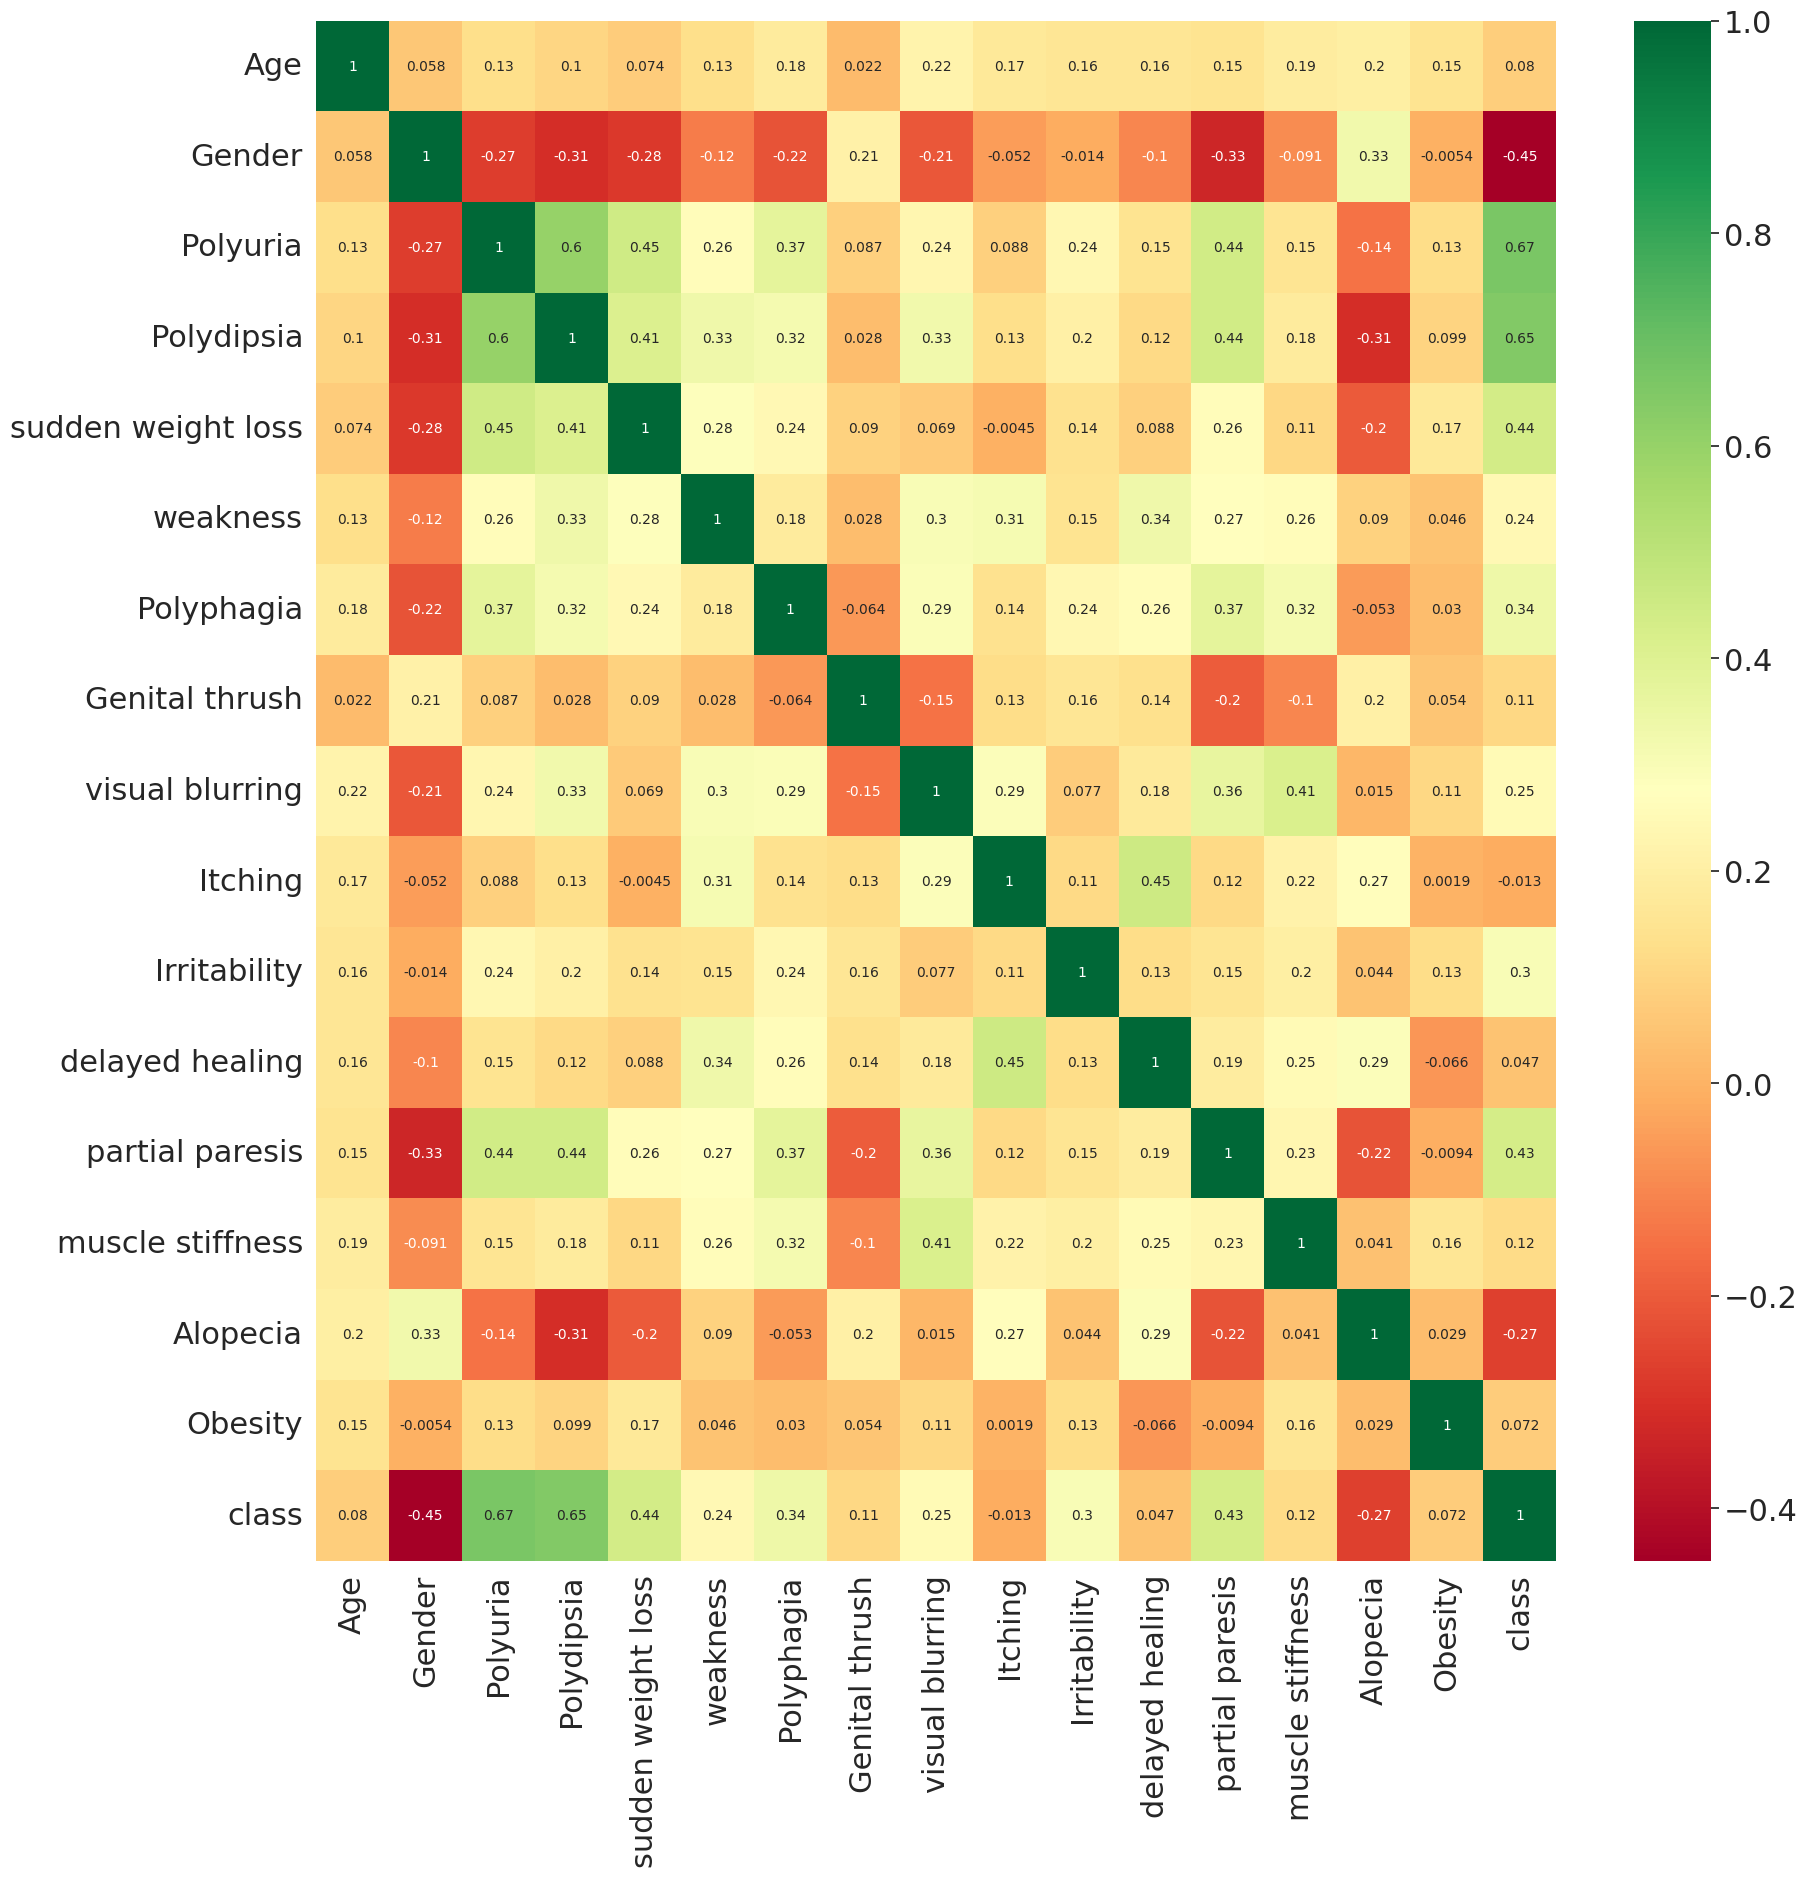

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale = 2 )

plt.subplots( figsize = (20,20) )

heat_plot = sns.heatmap(   df.corr(method='pearson') ,annot=True, cmap ='RdYlGn', annot_kws ={'size': 10}  )

plt.ytick(fontsize=20)
plt.xticks(fontsize=20)

plt.show()




## 🧠 First — Why Two Libraries?

| Library                | Purpose                                                                                               | Why We Use Both                                                                     |
| ---------------------- | ----------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------- |
| **Matplotlib** (`plt`) | The **base** Python plotting library — it handles low-level drawing (axes, labels, figure size, etc.) | Gives **full control** over figure size, ticks, and customization                   |
| **Seaborn** (`sns`)    | Built **on top of Matplotlib**, used for **beautiful, statistical plots**                             | Makes **complex visuals (like heatmaps, pairplots)** much easier and better looking |

👉 So, Seaborn makes **pretty plots easily**,
and Matplotlib helps **tune details** like figure size, labels, etc.

That’s why you often use both together.

---

## ⚙️ Code Breakdown

```python
import matplotlib.pyplot as plt
import seaborn as sns
```

* `matplotlib.pyplot` = gives control over plots (figure size, ticks, show, etc.)
* `seaborn` = adds high-level plotting functions (like `heatmap`, `pairplot`, etc.)

---

```python
sns.set(font_scale = 2)
```

* Sets the **style and scale** for all Seaborn plots.
* `font_scale=2` means **increase all font sizes** (like labels and annotations).
* This helps when your plot is large and you want text to stay readable.

---

```python
plt.subplots(figsize = (20, 20))
```

* Creates a **figure** with size 20x20 inches.
* This comes from Matplotlib and defines the **canvas** on which the Seaborn heatmap will be drawn.

Without this line, your plot might appear too small.

---

```python
heat_plot = sns.heatmap(df.corr(method='pearson'),
                        annot=True,
                        cmap='RdYlGn',
                        annot_kws={'size': 10})
```

Let’s unpack this:

1. `df.corr(method='pearson')`
   → Calculates the **correlation matrix** of your dataset.
   → Shows how strongly each pair of features is related (values between -1 and +1).

2. `sns.heatmap(...)`
   → Draws a color-coded **matrix** based on those correlations.
   → `annot=True` → displays the correlation values on the cells.
   → `cmap='RdYlGn'` → sets the **color theme** (Red–Yellow–Green gradient).
   → `annot_kws={'size': 10}` → makes the text smaller inside each cell.

---

```python
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
```

* These are **Matplotlib functions** to change the tick label sizes on the x and y axes.
* Even though Seaborn draws the heatmap, Matplotlib still controls the **axes**.

---

```python
plt.show()
```

* Displays the final figure.
* Comes from Matplotlib — Seaborn doesn’t show plots by itself.

---

## 🔥 Why Not Just Use Seaborn?

Because:

* Seaborn doesn’t have its own full figure management system (like `plt.figure()` or `plt.show()`).
* Matplotlib controls **layout**, **size**, and **display**.
* Seaborn handles **style**, **colors**, and **data visualization logic**.

They **complement each other**, not replace each other 💪

---

### 🧠 In One Line:

> **Matplotlib** = the “engine” that draws plots.
> **Seaborn** = the “artist” that makes them beautiful and easy to read.

---

Would you like me to show what this same code would look like **using only Matplotlib** (without Seaborn), so you can compare the difference visually?


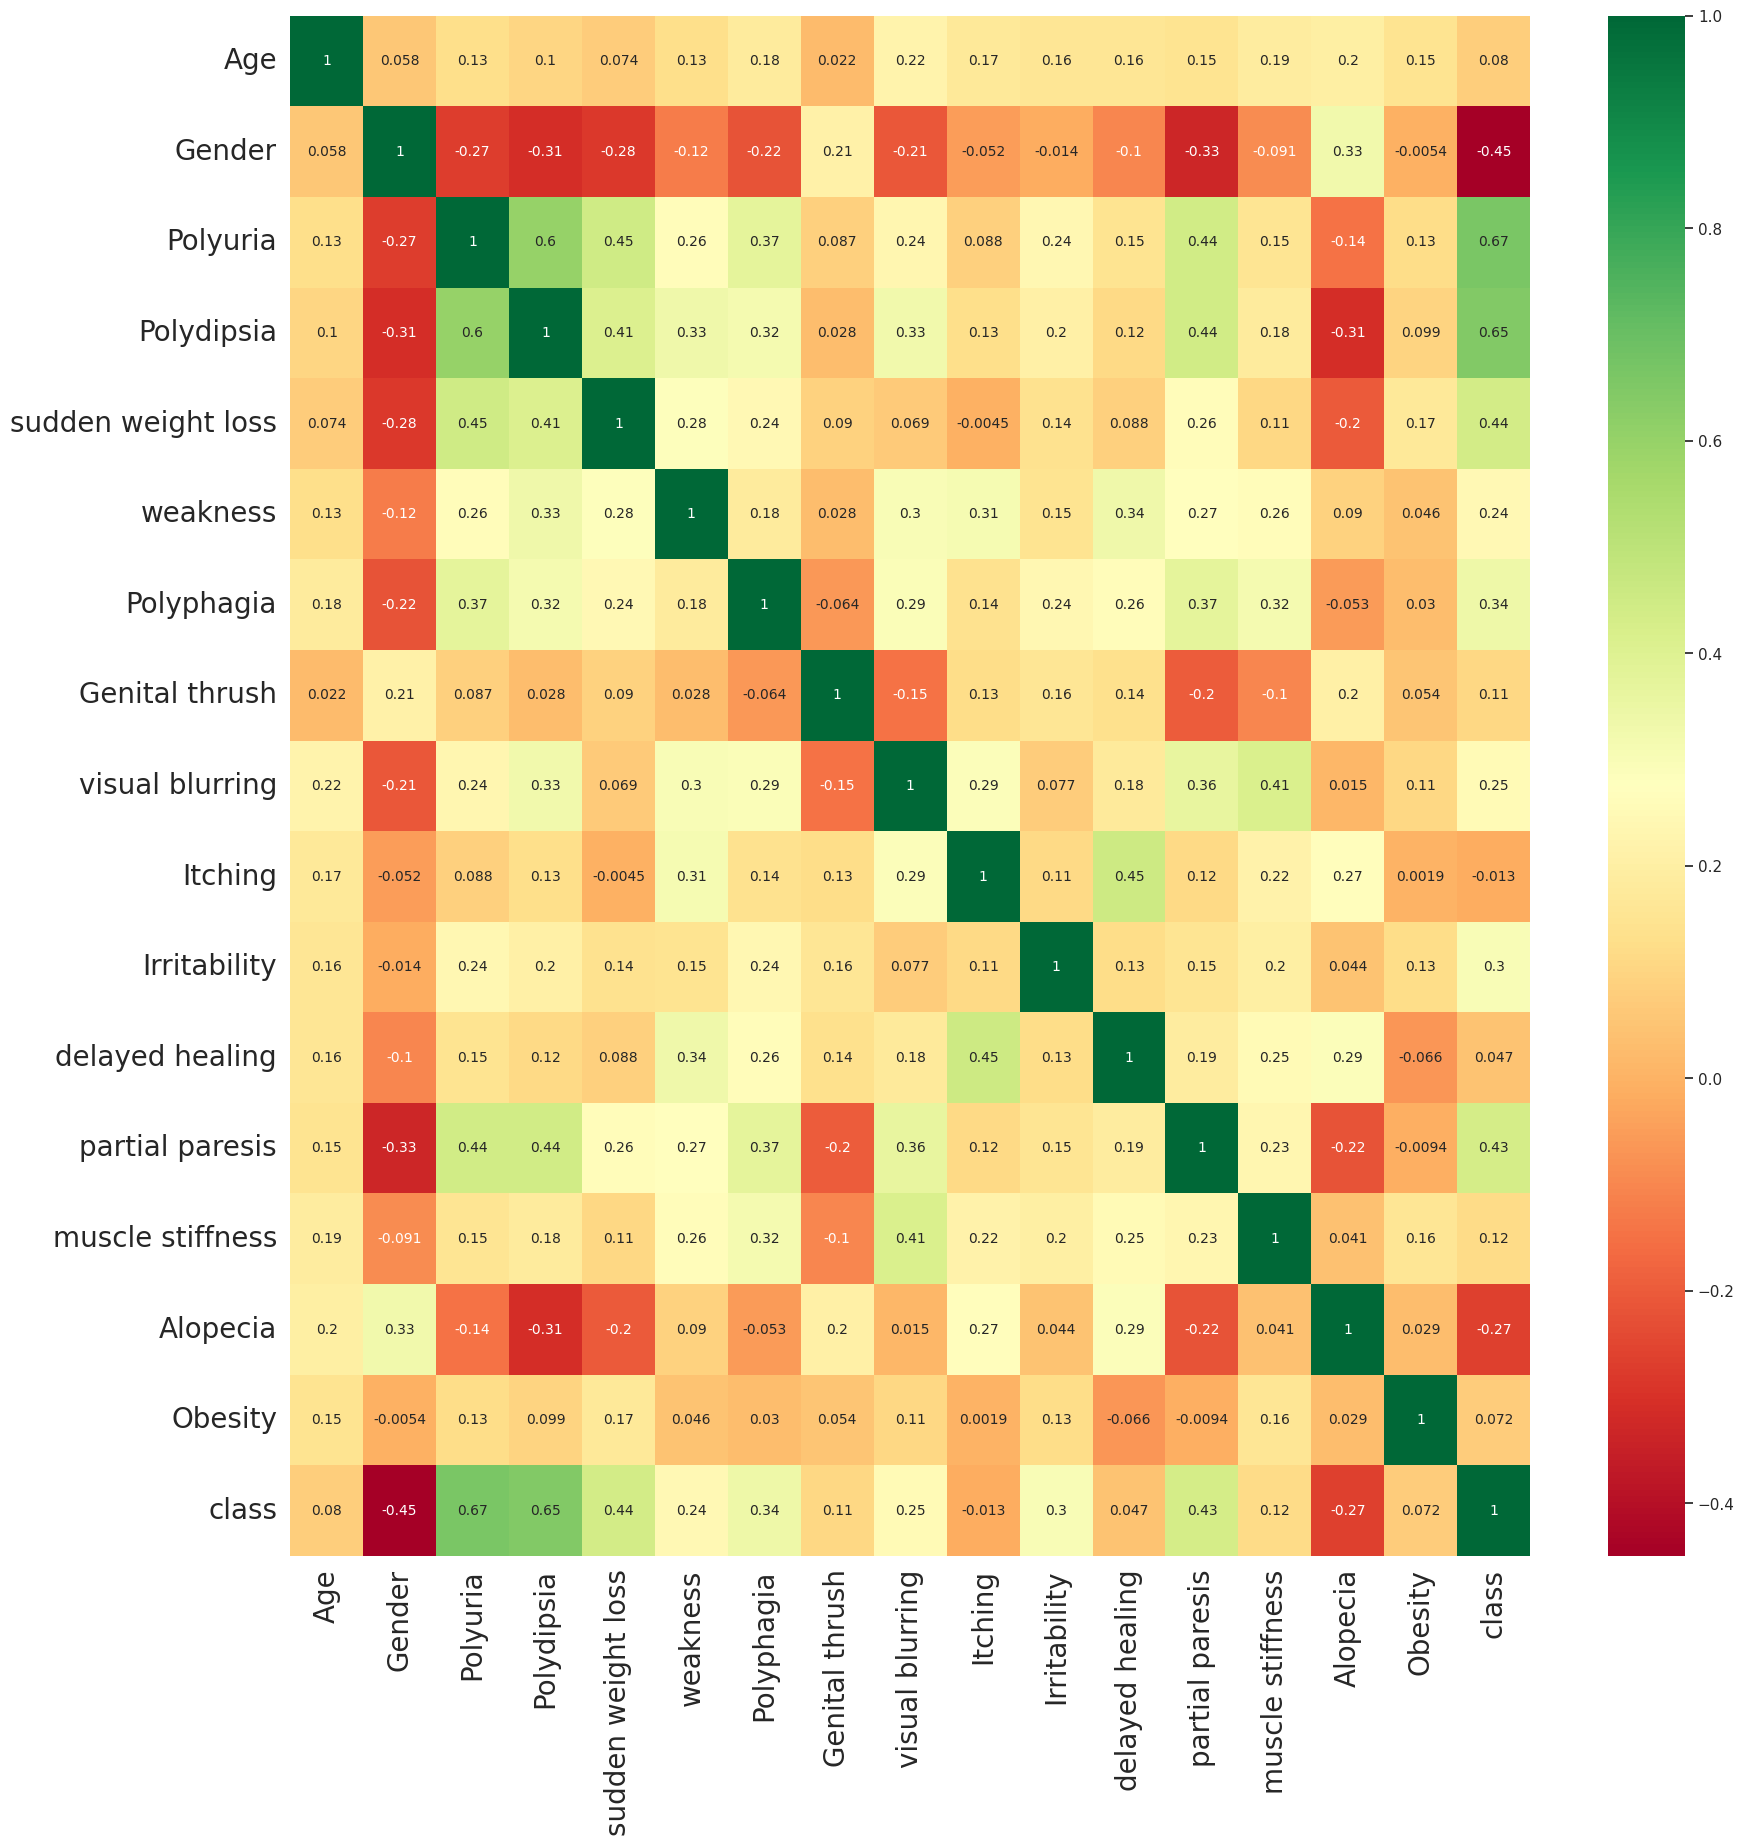

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale = 1 )

plt.subplots( figsize = (20,20) )

heat_plot = sns.heatmap(   df.corr(method='pearson') ,annot=True, cmap ='RdYlGn', annot_kws ={'size': 10}  )

plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.show()

In [ ]:
correlations = df.corr(method='pearson')
print(correlations['class'])  #corrlation of class with class

Age                   0.079512
Gender               -0.449233
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
weakness              0.243275
Polyphagia            0.342504
Genital thrush        0.110288
visual blurring       0.251300
Itching              -0.013384
Irritability          0.299467
delayed healing       0.046980
partial paresis       0.432288
muscle stiffness      0.122474
Alopecia             -0.267512
Obesity               0.072173
class                 1.000000
Name: class, dtype: float64


In [ ]:
temp = correlations['class'].sort_values(ascending=False).to_string()   # asceding values and converting to string
print(temp)

class                 1.000000
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
partial paresis       0.432288
Polyphagia            0.342504
Irritability          0.299467
visual blurring       0.251300
weakness              0.243275
muscle stiffness      0.122474
Genital thrush        0.110288
Age                   0.079512
Obesity               0.072173
delayed healing       0.046980
Itching              -0.013384
Alopecia             -0.267512
Gender               -0.449233


In [ ]:

df['class'].iloc[0:200]

,class
0,1
1,1
2,1
3,1
4,1
...,...
195,1
196,1
197,1
198,1


# Feature-Target



In [ ]:
X = df.drop(columns = ['class'])
y = df['class']

# Scale Feature

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x = scaler.fit_transform(X)

In [ ]:
scaled_x

array([[-0.3356796 ,  0.76509206, -0.99233705, ...,  1.29099445,
         1.38022749,  2.21564684],
       [ 0.32970817,  0.76509206, -0.99233705, ..., -0.77459667,
         1.38022749, -0.45133547],
       [-0.0399517 ,  0.76509206,  1.00772212, ...,  1.29099445,
         1.38022749, -0.45133547],
       ...,
       [ 0.32970817, -1.30703226,  1.00772212, ...,  1.29099445,
        -0.72451824,  2.21564684],
       [-0.6314075 , -1.30703226, -0.99233705, ..., -0.77459667,
         1.38022749, -0.45133547],
       [-0.26174763,  0.76509206, -0.99233705, ..., -0.77459667,
        -0.72451824, -0.45133547]])

# Train-test-split

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(scaled_x,y,test_size=0.2,random_state=42)

# Support vector machine

In [ ]:
from sklearn.svm import SVC

SVC_model = SVC(
    C = 0.5,
    kernel= 'poly',
    degree = 2,
    gamma='scale',
    coef0=0.0,
    tol=0.001,
    decision_function_shape='ovr',
    random_state=42,
    )

C = regulization paramater :


#Reference
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# Cross - validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


K_fold = KFold(10)

accuracy = cross_val_score(SVC_model , X_train,y_train, cv =K_fold , scoring = 'accuracy' )

precision = cross_val_score(SVC_model , X_train,y_train, cv =K_fold , scoring = 'precision' )

recall = cross_val_score(SVC_model , X_train,y_train, cv =K_fold , scoring = 'recall' )

f1_score = cross_val_score(SVC_model , X_train,y_train, cv =K_fold , scoring = 'f1' )

AUC = cross_val_score(SVC_model , X_train,y_train, cv =K_fold , scoring = 'roc_auc' )

In [ ]:
accuracy.mean()

np.float64(0.8725319396051103)

# Test performace (unsee data)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create SVM model
SVC_model = SVC(C=0.5, kernel='poly', degree=2, gamma='scale', coef0=0.0, tol=0.001, decision_function_shape='ovr')

# Train the model
SVC_model.fit(X_train, y_train)

# Make predictions
unseen_prediction = SVC_model.predict(X_test)

# Evaluate the model
print("Accuracy: ", accuracy_score(unseen_prediction, y_test))
print("Precision: ", precision_score(unseen_prediction, y_test))
print("Recall: ", recall_score(unseen_prediction, y_test))
print("F1 Score: ", f1_score(unseen_prediction, y_test))
print("ROC AUC Score: ", roc_auc_score(unseen_prediction, y_test))


# Question
1) why we've to scale feature for support vector machine ?
2 why first cross validatin on scled data but test on normal x_test?